In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

C:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 8s 1us/step


In [4]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [5]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [6]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [7]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [8]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


##### Softmax classifier

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [11]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [12]:
model = Sequential()
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [13]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 27us/step - loss: 1.2313 - acc: 0.7293 - val_loss: 0.7899 - val_acc: 0.8411
Epoch 2/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.7032 - acc: 0.8474 - val_loss: 0.5976 - val_acc: 0.8645
Epoch 3/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.5804 - acc: 0.8628 - val_loss: 0.5195 - val_acc: 0.8754
Epoch 4/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.5210 - acc: 0.8711 - val_loss: 0.4755 - val_acc: 0.8808
Epoch 5/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.4846 - acc: 0.8770 - val_loss: 0.4462 - val_acc: 0.8855
Epoch 6/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.4595 - acc: 0.8812 - val_loss: 0.4257 - val_acc: 0.8899
Epoch 7/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.4408 - acc: 0.8854 - val_loss: 0.4098 - val_acc

In [14]:
score = model.evaluate(X_test, Y_test, verbose =0)
print('Test score:', score[0]) 
print('Train accuracy:', score[1])

Test score: 0.3343462965846062
Test accuracy: 0.9081


In [19]:
epochs = list(range(1,nb_epoch+1))
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

<IPython.core.display.Javascript object>


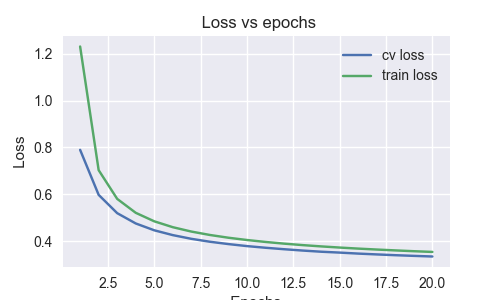

In [29]:
# getting acc, loss, cv_acc, cv_loss
train_acc = history.history['acc']
train_loss = history.history['loss']
cv_acc = history.history['val_acc']
cv_loss = history.history['val_loss']

plt.figure(figsize=(5,3))
plt.plot(epochs,cv_loss,label="cv loss")
plt.plot(epochs,train_loss,label="train loss")
plt.xlabel(" Epochs ")
plt.ylabel(" Loss ")
plt.legend()
plt.title(" Loss vs epochs")
plt.show()

##### MLP + sigmoid activation + SGD optimizer 


In [30]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [31]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 92us/step - loss: 2.2752 - acc: 0.1884 - val_loss: 2.2304 - val_acc: 0.3802
Epoch 2/20
60000/60000 [==============================] - 5s 89us/step - loss: 2.1892 - acc: 0.4223 - val_loss: 2.1356 - val_acc: 0.6074
Epoch 3/20
60000/60000 [==============================] - 5s 82us/step - loss: 2.0778 - acc: 0.5675 - val_loss: 1.9988 - val_acc: 0.6436
Epoch 4/20
60000/60000 [==============================] - 5s 82us/step - loss: 1.9180 - acc: 0.6334 - val_loss: 1.8071 - val_acc: 0.6658
Epoch 5/20
60000/60000 [==============================] - 5s 81us/step - loss: 1.7054 - acc: 0.6751 - val_loss: 1.5712 - val_acc: 0.6992
Epoch 6/20
60000/60000 [==============================] - 5s 82us/step - loss: 1.4698 - acc: 0.7124 - val_loss: 1.3385 - val_acc: 0.7326
Epoch 7/20
60000/60000 [==============================] - 5s 83us/step - loss: 1.2569 - acc: 0.7402 - val_loss: 1.1465 - val_acc

In [32]:
score = model_sigmoid.evaluate(X_test,Y_test,verbose=0)
print('Test score:', score[0]) 
print('Train accuracy:', score[1])

Test score: 0.46913096351623534
Train accuracy: 0.8735


In [33]:
epochs = list(range(1,nb_epoch+1))
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

<IPython.core.display.Javascript object>


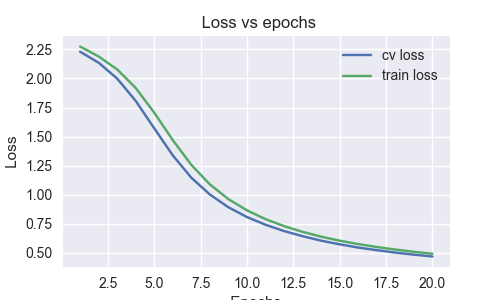

In [34]:
# getting acc, loss, cv_acc, cv_loss
train_acc = history.history['acc']
train_loss = history.history['loss']
cv_acc = history.history['val_acc']
cv_loss = history.history['val_loss']

plt.figure(figsize=(5,3))
plt.plot(epochs,cv_loss,label="cv loss")
plt.plot(epochs,train_loss,label="train loss")
plt.xlabel(" Epochs ")
plt.ylabel(" Loss ")
plt.legend()
plt.title(" Loss vs epochs")
plt.show()

In [35]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[1].flatten().reshape(-1,1)
out_w = w_after[2].flatten().reshape(-1,1)

<IPython.core.display.Javascript object>


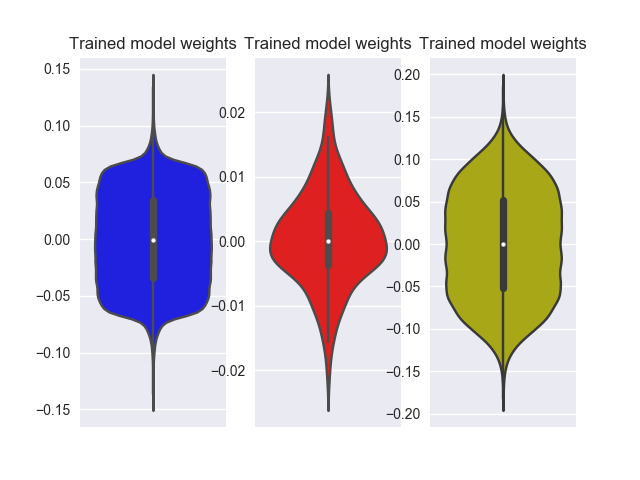

In [38]:
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1,3,1)
plt.title("Trained model weights")
sns.violinplot(y= h1_w, color='b')

plt.subplot(1,3,2)
plt.title("Trained model weights")
sns.violinplot(y= h2_w, color='r')

plt.subplot(1,3,3)
plt.title("Trained model weights")
sns.violinplot(y= out_w, color='y')

plt.show()

#### MLP + Sigmoid activation + ADAM

In [39]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid',input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, verbose=1, epochs=nb_epoch, validation_data=(X_test,Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.5508 - acc: 0.8509 - val_loss: 0.2502 - val_acc: 0.9279
Epoch 2/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.2188 - acc: 0.9358 - val_loss: 0.1852 - val_acc: 0.9448
Epoch 3/20
60000/60000 [==============================] - 8s 138us/step - 

In [40]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.07044513248081202
Test accuracy: 0.9815


<IPython.core.display.Javascript object>


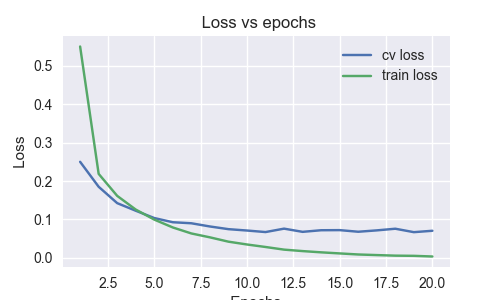

In [41]:
# getting acc, loss, cv_acc, cv_loss
train_acc = history.history['acc']
train_loss = history.history['loss']
cv_acc = history.history['val_acc']
cv_loss = history.history['val_loss']

plt.figure(figsize=(5,3))
plt.plot(epochs,cv_loss,label="cv loss")
plt.plot(epochs,train_loss,label="train loss")
plt.xlabel(" Epochs ")
plt.ylabel(" Loss ")
plt.legend()
plt.title(" Loss vs epochs")
plt.show()

In [42]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[1].flatten().reshape(-1,1)
out_w = w_after[2].flatten().reshape(-1,1)

<IPython.core.display.Javascript object>


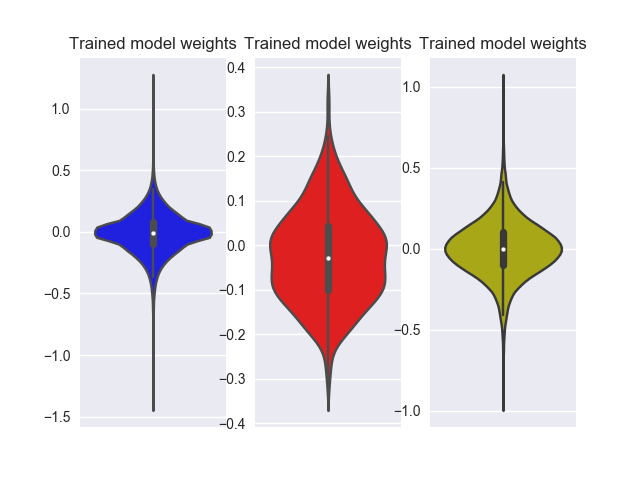

In [43]:
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1,3,1)
plt.title("Trained model weights")
sns.violinplot(y= h1_w, color='b')

plt.subplot(1,3,2)
plt.title("Trained model weights")
sns.violinplot(y= h2_w, color='r')

plt.subplot(1,3,3)
plt.title("Trained model weights")
sns.violinplot(y= out_w, color='y')

plt.show()

#### MLP + ReLu + SGD
- for relu layers, we will initialize weights from a normal dist
    - with sigma= root(2/fan_in))
    - this is He-initialization
- here
    - h1= root(2/fanin) = root(2/784) = 0.0505
    - h2 = root(2/512) = 0.062
    - h3 = root(2/ 128) = 0.125

In [46]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu',input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.0505, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(output_dim, activation='softmax', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [48]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.9629 - acc: 0.7696 - val_loss: 0.4692 - val_acc: 0.8813
Epoch 2/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.4165 - acc: 0.8888 - val_loss: 0.3490 - val_acc: 0.9065
Epoch 3/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.3415 - acc: 0.9043 - val_loss: 0.3058 - val_acc: 0.9139
Epoch 4/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.3045 - acc: 0.9140 - val_loss: 0.2782 - val_acc: 0.9230
Epoch 5/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.2796 - acc: 0.9212 - val_loss: 0.2583 - val_acc: 0.9274
Epoch 6/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.2602 - acc: 0.9259 - val_loss: 0.2443 - val_acc: 0.9325
Epoch 7/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.2446 - acc: 0.9312 - val_loss: 0.2307 - val_ac

In [49]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.14774932130277157
Test accuracy: 0.9565


<IPython.core.display.Javascript object>


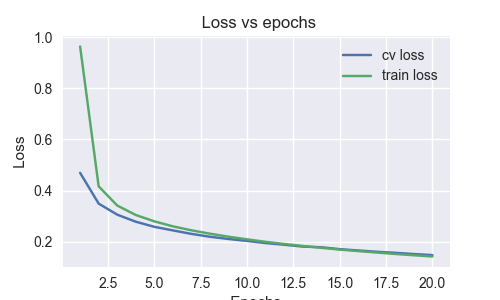

In [50]:
# getting acc, loss, cv_acc, cv_loss
train_acc = history.history['acc']
train_loss = history.history['loss']
cv_acc = history.history['val_acc']
cv_loss = history.history['val_loss']

plt.figure(figsize=(5,3))
plt.plot(epochs,cv_loss,label="cv loss")
plt.plot(epochs,train_loss,label="train loss")
plt.xlabel(" Epochs ")
plt.ylabel(" Loss ")
plt.legend()
plt.title(" Loss vs epochs")
plt.show()

In [51]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[1].flatten().reshape(-1,1)
out_w = w_after[2].flatten().reshape(-1,1)

<IPython.core.display.Javascript object>


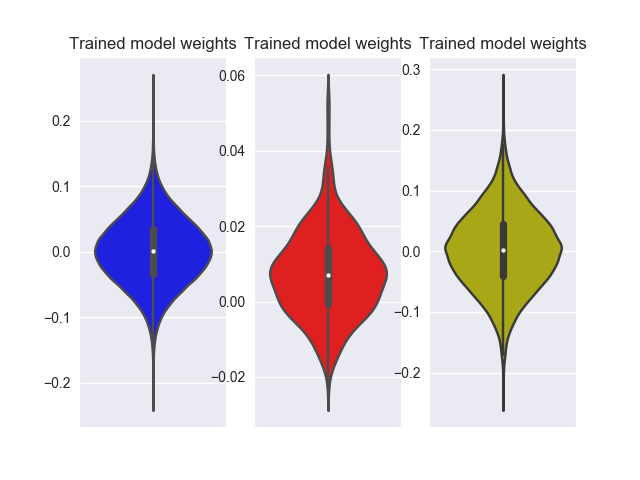

In [52]:
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1,3,1)
plt.title("Trained model weights")
sns.violinplot(y= h1_w, color='b')

plt.subplot(1,3,2)
plt.title("Trained model weights")
sns.violinplot(y= h2_w, color='r')

plt.subplot(1,3,3)
plt.title("Trained model weights")
sns.violinplot(y= out_w, color='y')

plt.show()

### MLP + Relu + Adam

In [53]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu',input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.0505, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(output_dim, activation='softmax', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))

model_relu.summary()

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test,Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.2361 - acc: 0.9313 - val_loss: 0.1186 - val_acc: 0.9641
Epoch 2/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.0889 - acc: 0.9729 - val_loss: 0.0933 - val_acc: 0.9703
Epoch 3/20
60000/60000 [==============================] - 8s 127us/step - 

Test score: 0.08710721571652423
Test accuracy: 0.9818


<IPython.core.display.Javascript object>


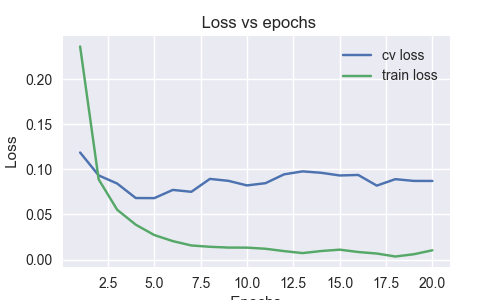

In [54]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

# getting acc, loss, cv_acc, cv_loss
train_acc = history.history['acc']
train_loss = history.history['loss']
cv_acc = history.history['val_acc']
cv_loss = history.history['val_loss']

plt.figure(figsize=(5,3))
plt.plot(epochs,cv_loss,label="cv loss")
plt.plot(epochs,train_loss,label="train loss")
plt.xlabel(" Epochs ")
plt.ylabel(" Loss ")
plt.legend()
plt.title(" Loss vs epochs")
plt.show()

<IPython.core.display.Javascript object>


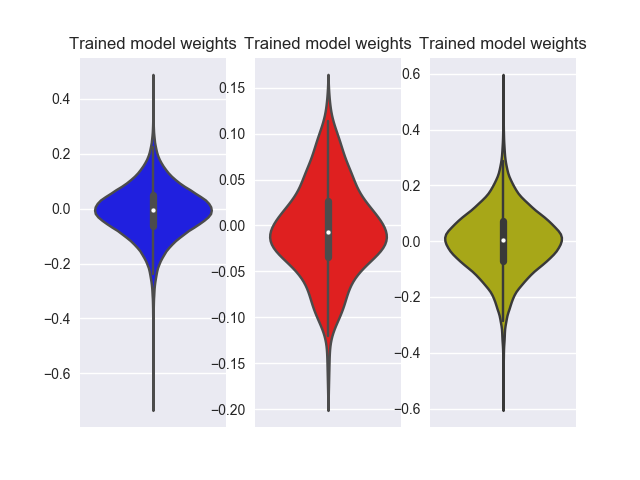

In [55]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[1].flatten().reshape(-1,1)
out_w = w_after[2].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1,3,1)
plt.title("Trained model weights")
sns.violinplot(y= h1_w, color='b')

plt.subplot(1,3,2)
plt.title("Trained model weights")
sns.violinplot(y= h2_w, color='r')

plt.subplot(1,3,3)
plt.title("Trained model weights")
sns.violinplot(y= out_w, color='y')

plt.show()

#### MLP + Batch - Norm on hidden layers + Adam optimizer
- Here we will use Xavier/ glorot init from normal dist
- here
    - h1= root(2/fanin+ fanout) = root(2/784+512) = 0.0392
    - h2 = root(2/512+128) = 0.0559
    - h3 = root(2/ 128+10) = 0.120

In [57]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()
model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.0392, seed=None)))
model_batch.add(BatchNormalization())
model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.559, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))
model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_16 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [58]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.2996 - acc: 0.9117 - val_loss: 0.2083 - val_acc: 0.9412
Epoch 2/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.1721 - acc: 0.9495 - val_loss: 0.1705 - val_acc: 0.9487
Epoch 3/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.1374 - acc: 0.9586 - val_loss: 0.1484 - val_acc: 0.9559
Epoch 4/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.1109 - acc: 0.9663 - val_loss: 0.1308 - val_acc: 0.9605
Epoch 5/20
60000/60000 [==============================] - 10s 172us/step - loss: 0.0939 - acc: 0.9714 - val_loss: 0.1309 - val_acc: 0.9588
Epoch 6/20
60000/60000 [==============================] - 9s 149us/step - loss: 0.0803 - acc: 0.9753 - val_loss: 0.1120 - val_acc: 0.9636
Epoch 7/20
60000/60000 [==============================] - 10s 163us/step - loss: 0.0684 - acc: 0.9793 - val_loss: 0.1158

Test score: 0.11315172780312133
Test accuracy: 0.97


<IPython.core.display.Javascript object>


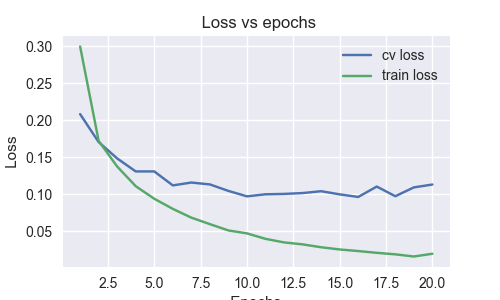

In [62]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
      
# getting acc, loss, cv_acc, cv_loss
train_acc = history.history['acc']
train_loss = history.history['loss']
cv_acc = history.history['val_acc']
cv_loss = history.history['val_loss']

plt.figure(figsize=(5,3))
plt.plot(epochs,cv_loss,label="cv loss")
plt.plot(epochs,train_loss,label="train loss")
plt.xlabel(" Epochs ")
plt.ylabel(" Loss ")
plt.legend()
plt.title(" Loss vs epochs")
plt.show()

<IPython.core.display.Javascript object>


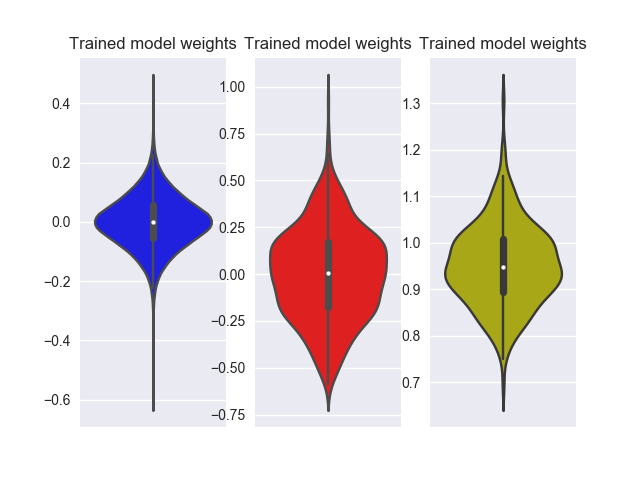

In [63]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[1].flatten().reshape(-1,1)
out_w = w_after[2].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1,3,1)
plt.title("Trained model weights")
sns.violinplot(y= h1_w, color='b')

plt.subplot(1,3,2)
plt.title("Trained model weights")
sns.violinplot(y= h2_w, color='r')

plt.subplot(1,3,3)
plt.title("Trained model weights")
sns.violinplot(y= out_w, color='y')

plt.show()

#### MLP + dropout + Adam
- here also we will use xavier initialization with sigmoid

In [65]:
from keras.layers import Dropout
from keras.layers import Dropout

model_drop = Sequential()
model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))
model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1290      
Total para

In [66]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 183us/step - loss: 0.6691 - acc: 0.7919 - val_loss: 0.2884 - val_acc: 0.9131
Epoch 2/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.4266 - acc: 0.8702 - val_loss: 0.2484 - val_acc: 0.9248
Epoch 3/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.3814 - acc: 0.8847 - val_loss: 0.2336 - val_acc: 0.9302
Epoch 4/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.3538 - acc: 0.8915 - val_loss: 0.2193 - val_acc: 0.9350
Epoch 5/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.3338 - acc: 0.8989 - val_loss: 0.2107 - val_acc: 0.9373
Epoch 6/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.3241 - acc: 0.9009 - val_loss: 0.2120 - val_acc: 0.9379
Epoch 7/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.3091 - acc: 0.9071 - val_loss: 0.194

Test score: 0.10355806139223278
Test accuracy: 0.9692


<IPython.core.display.Javascript object>


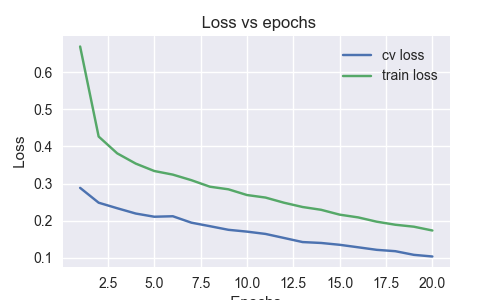

In [67]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
      
# getting acc, loss, cv_acc, cv_loss
train_acc = history.history['acc']
train_loss = history.history['loss']
cv_acc = history.history['val_acc']
cv_loss = history.history['val_loss']

plt.figure(figsize=(5,3))
plt.plot(epochs,cv_loss,label="cv loss")
plt.plot(epochs,train_loss,label="train loss")
plt.xlabel(" Epochs ")
plt.ylabel(" Loss ")
plt.legend()
plt.title(" Loss vs epochs")
plt.show()

<IPython.core.display.Javascript object>


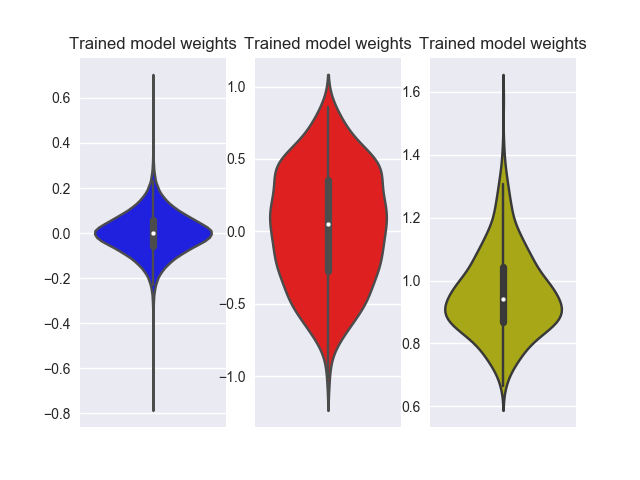

In [69]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[1].flatten().reshape(-1,1)
out_w = w_after[2].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1,3,1)
plt.title("Trained model weights")
sns.violinplot(y= h1_w, color='b')

plt.subplot(1,3,2)
plt.title("Trained model weights")
sns.violinplot(y= h2_w, color='r')

plt.subplot(1,3,3)
plt.title("Trained model weights")
sns.violinplot(y= out_w, color='y')

plt.show()

### Hyper-parameter tuning of Keras models using Sklearn
- we will use GridSearch

In [73]:
from keras.optimizers import Adam, RMSprop, SGD
def best_hyperparameters(activ):
    model = Sequential()
    model.add(Dense(512, activation=activ, input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
    model.add(Dense(128, activation=activ, kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
    model.add(Dense(output_dim, activation='softmax'))
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    return model

In [77]:
activ = ['sigmoid','relu']
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=best_hyperparameters, epochs=nb_epoch, batch_size=batch_size,verbose=0)
param_grid = dict(activ=activ)

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, Y_train)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))